# **Today we become data scientists** #

# CONTRIBUTORS #

This in-class exercise is to be done in pairs. Add the names of the two students in this text block.


# Workflow for today

Today we will work in both numpy and pytorch to learn the basics of fitting models to data.

*Today:* Today we are going to do two things:
1. Implement least squares using numpy and get a feel for how polynomial regression works.
2. Implement the same model in PyTorch and get a feel for what we lose when we use backprop.

# A first toy fit #

First I will give you a basic working example for how to fit a linear function:
$y(x) = A + B x$
to data. Your job will be to turn this into general purpose code.

**First generate data.** I'm going to generate data for a linear function.

In [1]:
import numpy as np
Ndatapoints = 20
x = np.linspace(0, 1, Ndatapoints)
y = 2*x + 1

**Build matrices.** Next I am going to generate the two matrices we derived in class
$$\mathbf{P} = \left\{x^i_d\right\}_{id}$$
$$\mathbf{M} = \left\{\sum_d x^i_d x^j_d \right\}_{ij}$$ 

In [ ]:
Pmatrix = np.zeros((Ndatapoints, 2)) # allocate with the correct shape then fill in
Pmatrix[:, 0] = 1
Pmatrix[:, 1] = x

Mmatrix = np.zeros((2, 2))           # allocate with the correct shape then fill in
Mmatrix[0, 0] = np.dot(Pmatrix[:, 0], Pmatrix[:, 0])
Mmatrix[0, 1] = np.dot(Pmatrix[:, 0], Pmatrix[:, 1])
Mmatrix[1, 0] = np.dot(Pmatrix[:, 1], Pmatrix[:, 0])
Mmatrix[1, 1] = np.dot(Pmatrix[:, 1], Pmatrix[:, 1])

# Here is a more compact way to do the same thing using a for loop
Mmatrix = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        Mmatrix[i, j] = np.dot(Pmatrix[:, i], Pmatrix[:, j])

**Solve least squares problem.** Finally, we build and solve the two systems in order to get the coefficients A and B. To do this we will use some functions from numpy - `np.dot` and `np.linalg.solve`. Use an LLM to get an explanation for how these should be used.

In [3]:
# Either we can build and solve the matrix equation directly
alpha = np.linalg.solve(Mmatrix,np.dot(Pmatrix.T,y))

# or we can use numpys built in least squares solver
alpha = np.linalg.lstsq(Pmatrix, y, rcond=None)[0]

**Make plot of the final results.** Finally, we'll confirm that our model fit recovers the data.

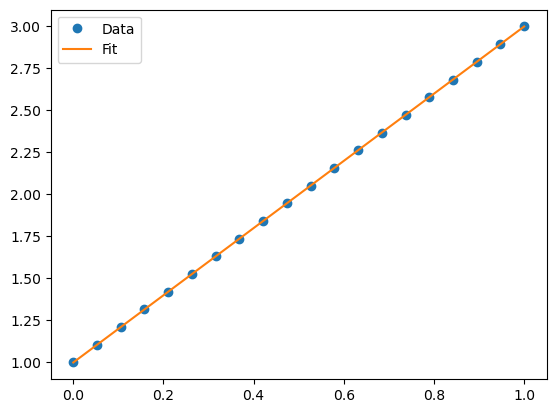

In [5]:
import matplotlib.pyplot as plt
xfit = np.linspace(0, 1, 100)
yfit = alpha[0] + alpha[1]*xfit
plt.figure()
plt.plot(x, y, 'o', label='Data')
plt.plot(xfit, yfit, label='Fit')
plt.legend()
plt.show()

In what follows, you will adapt this toy code into a reusable class, and then use that class to do some experiments and understand how models work as we vary the amount of available data and the size of the model.

# Building up a few datasets #

We will define functions to generate a few datasets that we'll use throughout today's exercise.

**Noisy linear function.** 
Build up a function that samples N random points on the unit interval. Evaluate the function
$$y(x) = 2 x + \epsilon$$
where $\epsilon$ is sampled from a normal distribution with zero mean and standard deviation 0.2. You will find the functions `np.random.rand` and `np.random.normal` to be useful. The function should return a set of N pairs of x,y values.

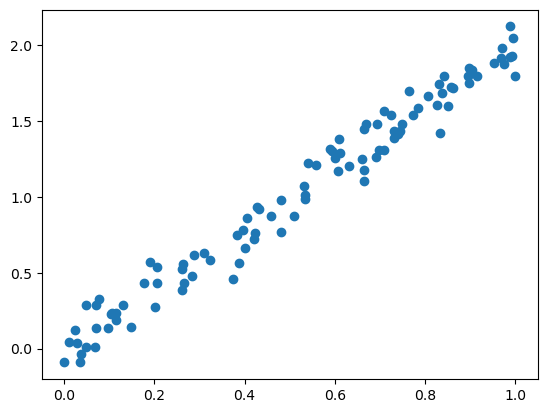

: 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def generate_noisylinear_data(N):
    x = np.random.rand(N)
    y = 2*x  + np.random.normal(0, 0.1, N)
    return x,y

# Test the function
data1 = generate_noisylinear_data(100)
plt.plot(data1[0],data1[1],'o')

**Polynomial function.** Generate N points uniformly spaced on the unit interval (Hint: you should use `np.linspace`) and evaluate the cubic polynomial:
$$y(x) = x^3 - 2*x^2 + x - 4$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_polynomial_data(N):
    # modify function here
    return np.zeros(N),np.zeros(N)

# Test the function
plt.plot(generate_polynomial_data(10)[0],generate_polynomial_data(10)[1],'o')

**Continuous function.** Generate N points uniformly spaced on the unit interval, and evaluate the function:
$$y(x) = \sin 2 \pi x$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_smoothfunction_data(N):
    # modify function here
    return np.zeros(N),np.zeros(N)

# Test the function
plt.plot(generate_smoothfunction_data(10)[0],generate_smoothfunction_data(10)[1],'o')

**Discontinuous function.** Generate N points uniformly spaced on the unit interval, and have them evaluate the function:
$$ y(x) =
\begin{cases} 
0 & \text{if } x < \frac12 \\
1 & \text{if } x \geq \frac12 
\end{cases}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_stepfunction_data(N):
    x = np.linspace(0,1,N)
    # way to do it number 1
    y = np.array(x < 0.5).astype(float)
    # with a for loop


In [ ]:
    y = np.zeros(N)
    for i in range(N):
        if x[i] >= 0.5:
            y[i] = 1
            
    return [x,y]

# Test the function
plt.plot(generate_stepfunction_data(10)[0],generate_stepfunction_data(10)[1],'o')

**Your turn.** Copy and paste images of all four functions here so that we can confirm you've generated 4 datasets to experiment with.

*Put stuff here.*

# Generate a general purpose least squares solver #

Building up a least squares solver is relatively straightforward, although the math is a little annoying. I'm going to step you through how to build up a class which will fit a polynomial to a given dataset. A skeleton for a `polyFitter` class is given below 

In [ ]:
class polyFitter:
    def __init__(self, polyorder, dataset):
        self.polyorder = polyorder # the order of the polynomial to fit
        self.dataset = dataset     # the dataset to be fitted
        self.solved = False        # a flag to indicate if the polynomial has been fitted
        self.coeffs = None         # the coefficients of the fitted polynomial, set to None if not fit yet
        
    def fit(self):
        # this is where we will build and solve the least squares problem
        #
        #
        
        self.solved = True                        # when finished we set the solved flag to True
        self.coeffs = np.zeros(self.polyorder+1)  # and set the coeffs to the solution
        return self.coeffs

    def evalfit(self):
        # after the model has been fit, we can evaluate it at any point x
        if not self.solved:
            print("Error: model not yet fit")
            return None
        else:
            # put stuff here
            return 0
    
    def plot(self):
        # generate a plot of the data and the fit. 
        # make sure to check that the model has been fit first!
        return 0

# Example usage - when you run this cell you should recover my example from the beginning
Ndatapoints = 20
x = np.linspace(0, 1, Ndatapoints)
y = 2*x + 1
fitToData = polyFitter(1, (x,y))
print(fitToData.fit()) # This should print [1., 2.]
fitToData.plot()       # This should plot the data and the fit

**Step 1.** We will first reproduce the example I gave at the beginning of the notebook, and make sure that our class generates the same behavior. Copy and paste the code to build the matrices and solve the least square problem into the evalfit function.
**Step 2.** Fix the interface. Make sure that all of the functions are pointing to the right things.

Take a stab at this. After a little while Prof. Trask will help you flesh this out on the projector, but we will continue to wrap bits of jupyter notebook in reusable classes as we continue the semester. It will be tough at first, but easy as you practice it.

# Experiments! #

We will do a series of experiments now to understand the interplay between the degree of the polynomial space and the amount of data. In lecture we discussed the complexity/data tradeoff - for a very powerful model we need enough data or the model will "overfit". I'll guide you through a series of experiments. First, we're going to build a little piece of code to visualize all of the choices of n (polynomial order) and N (number of data points).

In [ ]:
#this will plot a 3x3 grid of y = sin(2*pi*(n+m)x), where the row is n and the column is m
list_of_functions1 = [np.sin(2.*(0+m)*x) for m in range(3)]
list_of_functions2 = [np.sin(2.*(1+m)*x) for m in range(3)]
list_of_functions3 = [np.sin(2.*(2+m)*x) for m in range(3)]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# plot the first row
for i in range(3):
    ax = axes[0, i]
    ax.plot(x, list_of_functions1[i])
    ax = axes[1, i]
    ax.plot(x, list_of_functions2[i])
    ax = axes[2, i]
    ax.plot(x, list_of_functions3[i])


**Your turn.** This will be a more open ended exercise now. Your task is to generate a grid of plots exploring number of data in each row and number of monomials in each column. Repeat this for each of the different representative types of functions. To complete this task, it may take you 10-30m depending on your comfort level with Python.

In a markdown block below, describe qualitatively how the different functions respond differently. For which functions can you postulate a rule for how big of an n you can pick for a given N?

# A babystep in PyTorch #

We'll continue on Monday how to use PyTorch in the same setting and do some more experiments. For now, the following code snippet will repeat the initial objective of fitting y(x) = A + B*x to some data. To get warmed up (and check if you can get pytorch working) run the following pytorch code that will reproduce the first experiment we did today. 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (in our case, its y = A*x + b)
class LinearFitLayer(nn.Module):
    def __init__(self):
        super(LinearFitLayer, self).__init__()
        # Random guess for parameters A and B
        self.A = nn.Parameter(torch.randn(1))
        self.B = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.A * x + self.B

# Create a dataset
Ndatapoints = 20
x = np.linspace(0, 1, Ndatapoints)
y = 2*x + 1

# Convert the data to PyTorch tensors
x_data = torch.tensor(x, dtype=torch.float32,requires_grad=True)
y_data = torch.tensor(y, dtype=torch.float32,requires_grad=True)

# Instantiate the custom layer
layer = LinearFitLayer()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(layer.parameters(), lr=0.01)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = layer(x_data)
    loss = criterion(outputs, y_data)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print learned parameters
print(f'Learned parameter A: {layer.A.item()}')
print(f'Learned parameter B: {layer.B.item()}')

# Jumpstart on the homework #

If you happen to get this far during lecture today - great job! In this weeks homework, due a week from Monday, we will be using pytorch and least squares to fit a model to the data that came out of the rock paper scissors code. You can get a jump start on your homework by generating 20 simulations from your code and saving them to disk.

# Turning in assignments on Canvas #
In order to submit your assignment as a pair, you need to create a group on Canvas. This will enable you to both receive the same grade for one submission.

On Canvas, navigate to People > Groups > In-Class 13.
Find an empty group and add the names of both members of the pair.

Submit your work as both an ipynb and a pdf to Canvas.

Save the ipynb and upload from your hard drive. Also print a pdf file to ensure the graders can see you have completed the exercise, even if there are issues with the formatting in your jupyter notebook.

The student who did not submit should make sure that the group was created successfully by checking that they can also access the files on their Canvas page.